In [1]:
from random import randint, seed

In [2]:
seed(0)

In [3]:
class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f'Point(x={self.x}, y={self.y})'

In [4]:
class Rectangle(object):
    def __init__(self, x, y, w, h):
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def __repr__(self):
        return f'Rectangle(x={self.x}, y={self.y}, w={self.w}, h={self.h}'

    def contains(self, point):
        return (point.x >= self.x - self.w and
                point.x < self.x + self.w and
                point.y >= self.y - self.h and
                point.y < self.y + self.h)

In [5]:
class Quad(object):
    def __init__(self, boundary, capacity):
        '''
        cap: capacity of number of points in a quadtree
        root: node
        '''
        self.boundary = boundary
        self.capacity = capacity
        self.points = []
        self.ne = None
        self.nw = None
        self.se = None
        self.sw = None
        self.divided = False

    def insert(self, point):
        if not self.boundary.contains(point):
            return False

        if (len(self.points) < self.capacity):
            self.points.append(point)
            return True
        else:
            if not self.divided:
                self.subdivide()
                self.divided = True

        if self.ne.insert(point):
            return True
        elif self.nw.insert(point):
            return True
        elif self.se.insert(point):
            return True
        elif self.sw.insert(point):
            return True

    def subdivide(self):
        x = self.boundary.x
        y = self.boundary.y
        w = self.boundary.w
        h = self.boundary.h

        ne = Rectangle(x+w/2, y-h/2, w/2, h/2)
        nw = Rectangle(x-w/2, y-h/2, w/2, h/2)
        se = Rectangle(x+w/2, y+h/2, w/2, h/2)
        sw = Rectangle(x-w/2, y+h/2, w/2, h/2)

        self.ne = Quad(ne, self.capacity)
        self.nw = Quad(nw, self.capacity)
        self.se = Quad(se, self.capacity)
        self.sw = Quad(sw, self.capacity)

    def __repr__(self):
        return f'Quad(capacity={self.capacity}, boundary={self.boundary}, points={self.points}, se={self.se}, sw={self.sw}, ne={self.ne}, nw={self.nw}, divided={self.divided})'


In [6]:
point = Point(0, 0)
rect = Rectangle(0, 0, 100, 100)
quad = Quad(rect, 4)
rand_points = [Point(randint(1, 10), randint(1, 10)) for _ in range(10)]
for p in rand_points:
    quad.insert(p)

In [7]:
# from lolviz import *
# g = treeviz(quad)
# g.view()

'Source.gv.pdf'

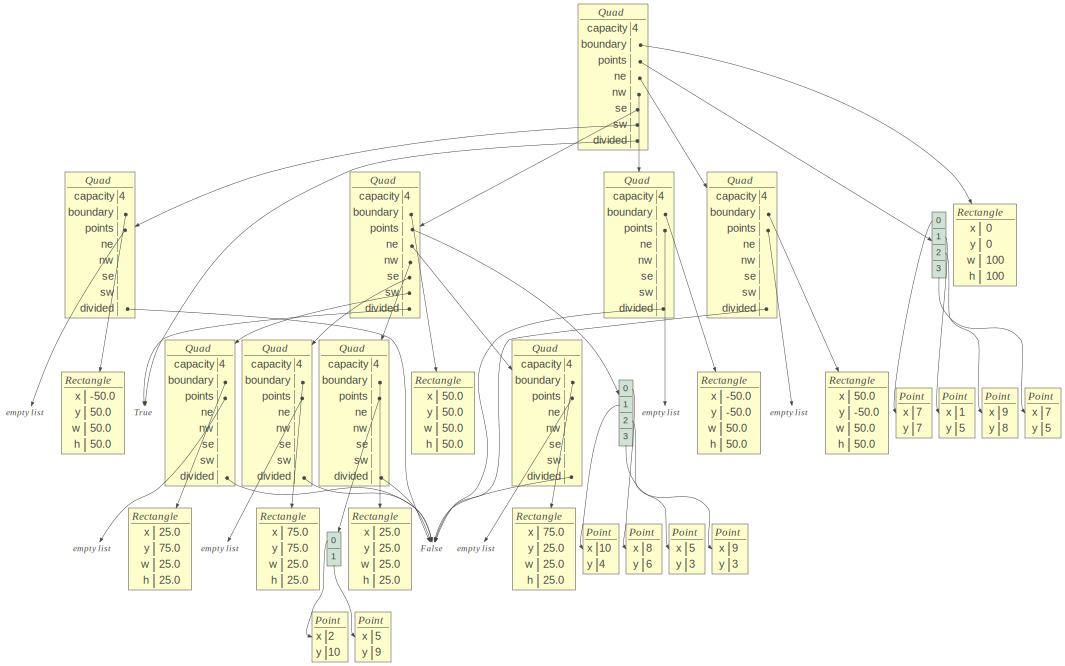

In [8]:
treeviz(quad)